<a href="https://colab.research.google.com/github/gmmendez/EA2SOA/blob/master/EA3_Mendez_Gonzalo_39913544_Ejercicio2_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Introduccion**

La técnica de riego por goteo se caracteriza por ser muy eficiente en el uso del agua ya que la misma se aplica en forma de gotas por emisores llamados goteros, alimentados por una tubería plástica.
Gota a gota se conforma en el suelo o en el sustrato un bulbo húmedo cuya forma y dimensión se establece en función de las características de ese medio, de la cantidad de agua aplicada y de la frecuencia con que se aplica. Esto permite lograr una zona húmeda en concordancia con la ubicación de la mayor parte de las raíces, evitando desperdicios de agua y nutrientes.

Supongamos que se dispone de una hectárea que requiere de 7 milímetros de agua diariamente, y se dispone de una bomba eléctrica de agua que expende 4000 litros de agua por hora (1.11 litros por segundo). Según el cálculo de la dotación de riego (medida usada para calcular cuanta superficie se podría regar en función del agua disponible), la cantidad de horas que debería estar en funcionamiento dicha bomba sería:



> Dotación de riego = 1.11 litros de agua por segundo / 2.78 = 0.4 mm por hectárea por hora


> Requerimiento diario de riego / Dotación = 7 milimetros / 0.4 = 17.5

Es decir que se necesitaría que la bomba se encuentre funcionando 17.5 horas al día.

En cambio, la técnica de riego por goteo establece que se debe dividir el terreno a regar en porciones, y debido a la distribución de los emisores o goteros, la superficie efectiva de aplicación se reduce aproximadamente a la mitad de cada porción ya que habrá áreas de cultivo y espacios interlineares que no se riegan.


**Veamos entonces los cálculos que lo demuestran:**

Si se subdivide la hectárea en 10 sectores de riego y, además se reduce a la mitad el área efectiva a regar (ya que existen espacios interfilares que no se riegan) podríamos aplicar unos 7 mm de agua en solamente una hora de riego en cada una de las secciones. Por lo tanto en aproximadamente 8 horas diarias de operación de riego se puede cubrir una hectárea de cultivo, veamos:



> 1 hectárea dividida en 10 porciones = 0.1 hectárea cada porción.



> De cada porción de 0.1 hectárea, se riega efectivamente la mitad, con lo cual: 0.1 * 0.5 = 0.05 hectáreas debo regar por cada porción.


> Para regar con 7 mm de agua una hectárea necesito 17.5 horas de funcionamiento de una bomba que expende 4000 litros por hora, con lo cuál para regar 0.05 hectáreas: 17.5 horas * 0.05 hectáreas = 0.87 horas por porción de 0.05 hectareas (500 metros cuadrados).

En el presente ejercicio, se pretende resolver estos calculos mediante la utilización de dos matrices:

1- Una de ellas representará una hectárea de cultivo dividida en N porciones en las cuales, dado que en cada porción se realizó un cultivo diferente, se va a requerir una cantidad de agua distinta en cada porción diariamente.

2- La segunda matriz representará, para cada porción, la cantidad de tiempo -expresado en minutos- que se debe mantener en funcionamiento la bomba de agua para regar los milímetros requeridos por cada porción.

En contraposición con el mismo ejercicio ejecutado en un ambiente en que se dispone de una CPU junto con una GPU, en el presente entorno de ejecución no se dispone de una GPU, con lo cual todos los calculos realizados sobre cada posición de la primer matriz se realizarán secuencialmente. Esto nos permite corroborar la diferencia de tiempo y de eficiencia que existe entre ambos entornos.

**2. Armado de ambiente**

No es necesario realizar ningun tipo de ejecución previa a la ejecución del ejercicio para armar el ambiente.

**3. Desarrollo**

A continuación se encuentra el código desarrollado para realizar el cálculo de la cantidad de horas que debe estar en funcionamiento cada bomba de agua instalada en las distintas porciones en las que se dividió la hectarea de cultivo, sin utilizar la potencia de cálculo de GPU, esto es, realizando una ejecución secuencial sobre CPU.

In [1]:
# --------------------------------------------
#@title 3.1 Parámetros de ejecución { vertical-output: true }

cant_hectareas =   100#@param {type: "number"}
# --------------------------------------------

from datetime import datetime
tiempo_total = datetime.now()
import numpy


# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0


ltsPorHora = numpy.random.randint(2000,9000)
print("Litros por hora expendidos por la bomba: ", ltsPorHora)
n = cant_hectareas
porcion = 1/(n)

# CPU - Defino la memoria de las matrices en cpu.
mmPorSector_CPU = numpy.random.randint(1, 6, size=(n, n))
mmPorSector_CPU = mmPorSector_CPU.astype(numpy.float32())

minPorSector_CPU = numpy.zeros_like(mmPorSector_CPU)
minPorSector_CPU = minPorSector_CPU.astype(numpy.float32())

#print(mmPorSector_CPU)
#print("ltsPorHora", ltsPorHora)


segundos = 3600
coeficiente = 2.78
minutos = 60

tiempo_funcion = datetime.now()

for y  in range( 0, n ):
  for x in range( 0, n ):
    dotacion = (ltsPorHora / segundos) / coeficiente
    hsPorHectarea = mmPorSector_CPU[x][y]/dotacion
    riegoEfectivo = porcion * 0.5
    hsPorSeccion = riegoEfectivo * hsPorHectarea
    minPorSector_CPU[x][y] = hsPorSeccion * minutos

tiempo_funcion = datetime.now() - tiempo_funcion

tiempo_total = datetime.now() - tiempo_total

print( "Tiempo de ejecucion de la funcion:", tiempo_en_ms( tiempo_funcion   ), "[ms]" )
print( "Tiempo Total:", tiempo_en_ms( tiempo_total ), "[ms]" )

print("Matriz de milimetros: ")
print(mmPorSector_CPU)
print("")
print("Matriz con tiempo: ")
print(minPorSector_CPU)

Litros por hora expendidos por la bomba:  2843
Tiempo de ejecucion de la funcion: 62.036 [ms]
Tiempo Total: 68.67 [ms]
Matriz de milimetros: 
[[4. 4. 4. ... 3. 3. 3.]
 [1. 4. 3. ... 4. 1. 2.]
 [3. 3. 2. ... 5. 3. 4.]
 ...
 [3. 1. 5. ... 5. 4. 5.]
 [4. 5. 5. ... 2. 1. 3.]
 [5. 4. 5. ... 2. 5. 3.]]

Matriz con tiempo: 
[[4.2242703 4.2242703 4.2242703 ... 3.1682026 3.1682026 3.1682026]
 [1.0560676 4.2242703 3.1682026 ... 4.2242703 1.0560676 2.1121352]
 [3.1682026 3.1682026 2.1121352 ... 5.280338  3.1682026 4.2242703]
 ...
 [3.1682026 1.0560676 5.280338  ... 5.280338  4.2242703 5.280338 ]
 [4.2242703 5.280338  5.280338  ... 2.1121352 1.0560676 3.1682026]
 [5.280338  4.2242703 5.280338  ... 2.1121352 5.280338  3.1682026]]


**4. Tabla de pasos**

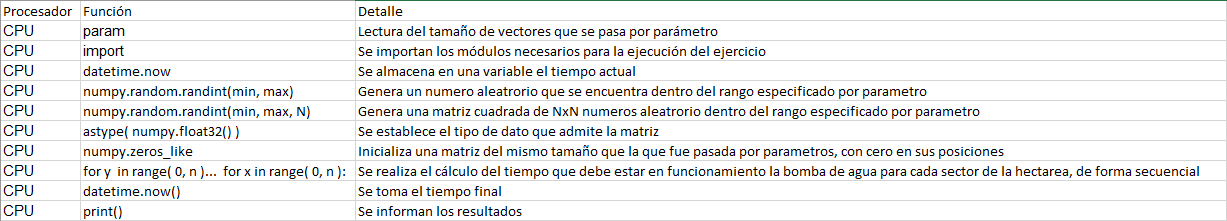

**5. Conclusiones**

*Repaso*

Tal como mencionamos anteriormente, en el presente entorno de ejecución no se utiliza una GPU, con lo cual cada una de las instrucciones y cálculos que se realizan en la solución, se ejecutan secuencialmente. Solamente se puede ejecutar una operacion de calculo -que se realiza sobre una posición de la matriz- a la vez, a diferencia del procesamiento con GPU donde todas las operaciones de calculo sobre la matriz se ejecutaban simultaneamente.
Es por ello que, como se puede observar en los tiempos arrojados por el ejercicio, los mismos aumentan considerablemente si los comparamos con la solución que utiliza GPU.

La diferencia de tiempo se hace más evidente al aumentar el grado de la matriz. Se puede comprobar en este ejercicio que, al trabajar sobre una matriz de 100 filas por 100 columnas, la cantidad de tiempo que demora en ejecutarse secuencialmente las sentencias for, es del orden de los 45 milisegundos, mientras que si verificamos la cantidad de tiempo que demora en ejecutarse la funcion kernel en un entorno donde se utiliza GPU, es del orden de los 0.27 milisegundos, una significativa diferencia.

*Lecciones aprendidas*

Este primer ejercicio realizado de forma secuencial me permitió comprobar la evidente diferencia que existe entre un entorno en el que solamente se trabaja con CPU, con un entorno en el que se trabaja con CPU + GPU. A su vez, queda demostrado que para el caso en que se requiera ejecutar una solución donde se deban realizar una gran cantidad de cálculos pesados, la utilización de un entorno que utiliza GPU representa una ventaja, ya que de lo contrario, la ejecución podría demorar tiempos inaceptables.

*Sugerencias para continuar con el ejercicio*

Una serie de funcionalidades adicionales pueden ser agregadas al ejercicio presentado para que el mismo sea más completo. Por ejemplo, se podría agregar una matriz más donde cada posición puede representar una bomba eléctrica de agua distinta, con lo cuál si el productor dispone de varias bombas de agua, podría utilizar una para cada porción de hectárea que dispone, y el ejercicio se encargaría de calcular el tiempo que cada una de las bombas debe estar en funcionamiento. Otra posible sugerencia sería que el productor (usuario) tenga la posibilidad ingresar la cantidad de agua que requiere cada porción de la hectárea a la matriz.

**6. Bibliografia**

[1] Documentacion Numpy: [Sitio web](https://numpy.org)

[2] INTA - Riego por goteo: [Sitio web](https://inta.gob.ar/sites/default/files/inta_disenio-proyectos-de-riego-por-goteo.pdf)

[3] Documentación Python: [Sitio web](https://docs.python.org/3/)